In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#perc_files = [os.path.join(file) for file in os.scandir('/home/sc.uni-leipzig.de/jn906hluu/PhaseTransitions') if 'close' in file.name]
perc_files = [os.path.join(file) for file in os.scandir('/home/sc.uni-leipzig.de/jn906hluu/PhaseTransitions') if ('.txt' in file.name) & ('3d' in file.name)]

In [3]:
perc_files.sort()
perc_files

def custom_key(file):

    return int(file.split('_')[-1].split('.')[0])

perc_files.sort(key=custom_key)

perc_files = perc_files

In [4]:
list_L = [custom_key(file) for file in perc_files]

In [5]:
files_loaded = np.array([np.loadtxt(file) for file in perc_files])
files_loaded


array([[[3.9000000e+01, 3.9000000e+01, 3.9000000e+01, ...,
         6.0000000e+01, 6.5000000e+01, 5.7000000e+01],
        [4.5000000e+01, 4.5000000e+01, 4.5000000e+01, ...,
         5.0000000e+01, 1.0000000e+00, 6.0000000e+00]],

       [[3.7000000e+01, 3.7000000e+01, 3.7000000e+01, ...,
         2.6800000e+02, 2.1200000e+02, 2.1300000e+02],
        [1.5810000e+03, 1.5810000e+03, 1.5810000e+03, ...,
         5.8000000e+01, 6.6400000e+02, 7.1300000e+02]],

       [[4.1000000e+01, 4.1000000e+01, 4.3000000e+01, ...,
         4.9900000e+02, 5.0200000e+02, 5.0500000e+02],
        [6.2120000e+03, 6.2130000e+03, 6.2740000e+03, ...,
         7.5300000e+02, 7.9800000e+02, 7.9900000e+02]],

       ...,

       [[2.7400000e+02, 2.7800000e+02, 2.8200000e+02, ...,
         5.7283900e+05, 5.7621800e+05, 5.7946600e+05],
        [1.0147855e+07, 1.0480019e+07, 1.0934516e+07, ...,
         4.6738900e+05, 4.1203200e+05, 3.8144500e+05]],

       [[2.6100000e+02, 2.6100000e+02, 2.6200000e+02, ...,
        

In [41]:
p_range = np.linspace(0, 1, 100)
#p_range = np.linspace(0.4, 0.8, 41)
p_crit = 0.59274

p_range = np.linspace(0.45, 0.65, 100)


#p_range = np.linspace(p_crit - 0.05, p_crit + 0.05, 100)



#list_L = [100, 200, 300, 400, 500, 600, 700, 800, 900]

In [42]:
list_L

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990]

max_cluster_size, average_cluster_size, average_square_size, sigma_of_size, fluctuation_of_size

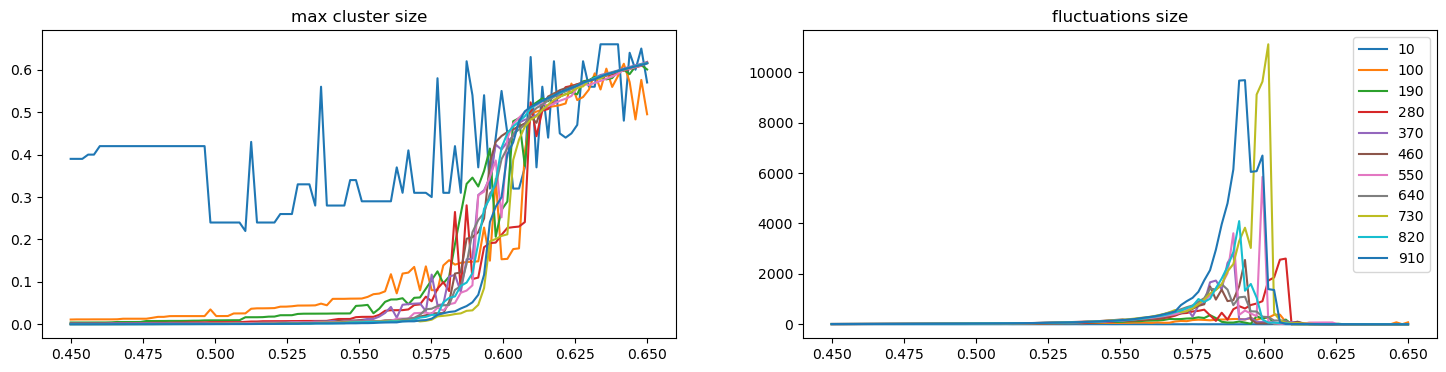

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

for grid_size_index in np.arange(files_loaded.shape[0], step=9):
    L = list_L[grid_size_index]
    ax[0].set_title('max cluster size')
    ax[0].plot(p_range, files_loaded[grid_size_index, 0, :] / L**2, label=f'{L}')

    ax[1].set_title('fluctuations size')
    ax[1].plot(p_range, files_loaded[grid_size_index, 1, :] / L**2, label=f'{L}')



    plt.legend()

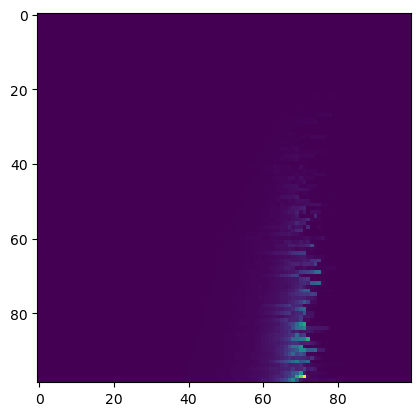

In [44]:
chis = files_loaded[:,1,:]

plt.imshow(chis)

In [45]:
L_dim = files_loaded.shape[0]

Ls = list_L[:L_dim]

In [46]:
from scipy.optimize import curve_fit

In [47]:
def lin_fit(x, a):
    return a * x 

(LinregressResult(slope=-0.19140644899916512, intercept=-0.3129380089773983, rvalue=-0.3662574162645552, pvalue=0.00019273240062907013, stderr=0.04937498571340448, intercept_stderr=0.12869371859574766),
 LinregressResult(slope=1.4703478408651758, intercept=-0.4853558681919976, rvalue=0.9355658845844205, pvalue=1.2247384988393341e-45, stderr=0.056353612181057, intercept_stderr=0.1468832001284803))

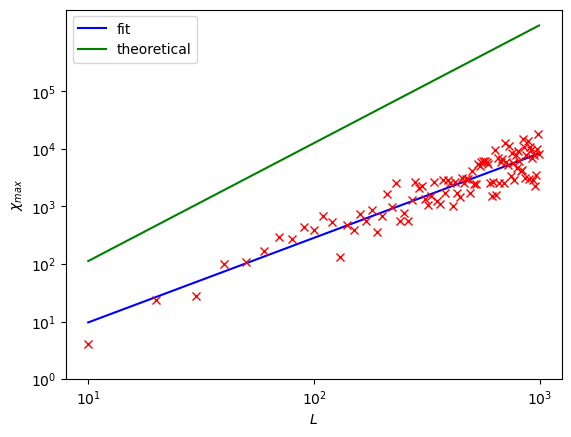

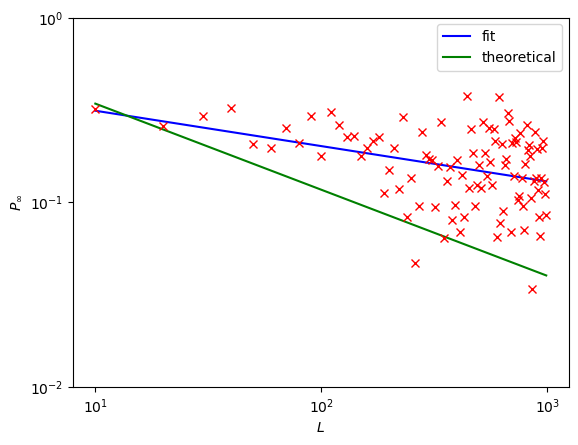

In [139]:
beta = 0.41
gamma = 1.805
nu = 0.88


index_p_crit = [np.argmax(files_loaded[i,1,:]) for i in range(L_dim)]

chi_max = [files_loaded[i, 1, j]/list_L[i]**2 for i, j in zip(range(L_dim), index_p_crit)]

p_inf_max = [files_loaded[i, 0, j]/list_L[i]**2 for i, j in zip(range(L_dim), index_p_crit)]

from scipy.stats import linregress

y1 = np.log10(chi_max)
y2 = np.log10(p_inf_max)
x = np.log10(Ls)


popt, pcov = curve_fit(lin_fit, x, y1)

chi_sol = linregress(x, y1)

p_sol = linregress(x, y2)

Ls = np.array(Ls)

plt.plot(x, x * chi_sol.slope + chi_sol.intercept, 'b', label = 'fit')
plt.plot(x, x * gamma / nu, 'g', label = 'theoretical')
plt.plot(x, y1, 'rx')
plt.xticks([1, 2, 3], ['$10^1$', '$10^2$', '$10^3$'])
plt.yticks([0, 1, 2, 3, 4, 5], ['$10^{0}$','$10^1$', '$10^2$', '$10^3$', '$10^4$', '$10^5$'])
plt.ylabel('$\chi_{max}$')
plt.xlabel('$L$')
plt.legend()



plt.figure()
plt.plot(x, x*p_sol.slope + p_sol.intercept, 'b', label = 'fit')
plt.plot(x, x * -beta / nu , 'g', label = 'theoretical')
plt.plot(x, y2, 'rx')
plt.xticks([1, 2, 3], ['$10^1$', '$10^2$', '$10^3$'])
plt.yticks([0, -1, -2], ['$10^{0}$','$10^{-1}$', '$10^{-2}$'])
plt.ylabel('$P_{\infty}$')
plt.xlabel('$L$')
plt.legend()




p_sol, chi_sol

In [140]:
p_crits = np.array([p_range[np.argmax(files_loaded[i,1,:])] for i in range(L_dim)])
ppc = np.array([np.abs(p_range - p_crits[i]) for i in range(L_dim)])

In [141]:
good_idx = [i for i in range(L_dim) if (p_crits[i] < p_crits[i-1]) & (i > 5)]

/tmp/ipykernel_295781/4228170429.py:9: RuntimeWarning: divide by zero encountered in log10
  logx = np.log10(xscaling)


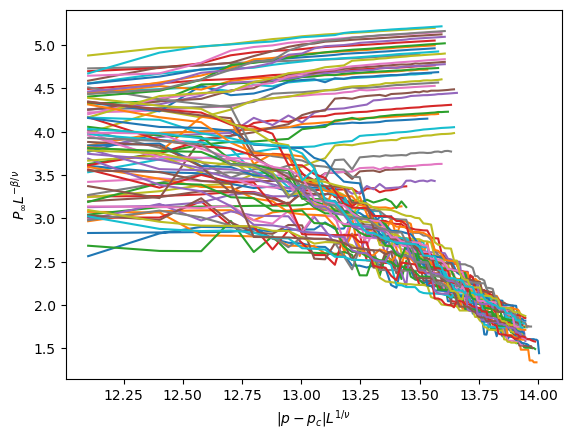

In [166]:
fig, ax = plt.subplots()



for i in good_idx:
    xscaling = ppc[i] * L ** (1/0.2)
    yscaling = files_loaded[i, 0, :] * L ** (p_sol.slope)

    logx = np.log10(xscaling)
    logy = np.log10(yscaling)

    ax.plot(logx, logy, label=f'{L}')

    plt.ylabel(r'$P_{\infty} L^{-\beta/\nu}$')
    plt.xlabel(r'$\left|p - p_c\right| L^{1/\nu}$')



/tmp/ipykernel_295781/4069254713.py:6: RuntimeWarning: divide by zero encountered in log10
  logx = np.log10(xscaling)


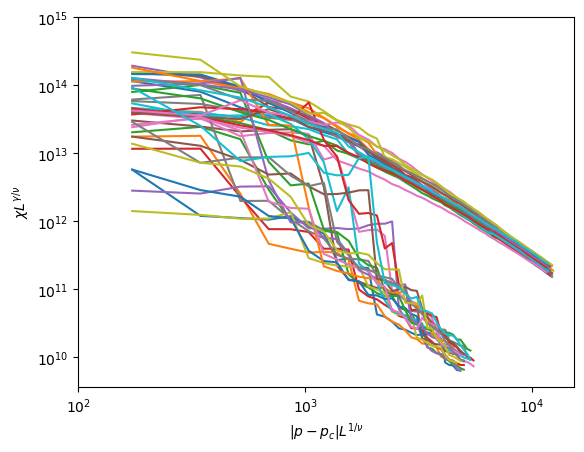

In [172]:
for i in range(L_dim)[-20:]:

    xscaling = ppc[i] * L ** (1/.6)
    yscaling = files_loaded[i, 1, :] * L ** (chi_sol.slope)

    logx = np.log10(xscaling)
    logy = np.log10(yscaling)

    plt.plot(logx, logy, label=f'{L}')
    plt.yticks([10, 11, 12, 13, 14, 15], ['$10^{10}$','$10^{11}$','$10^{12}$', '$10^{13}$', '$10^{14}$', '$10^{15}$'])
    plt.xticks([2, 3, 4,], ['$10^2$', '$10^3$', '$10^4$',])
    plt.ylabel(r'$\chi L^{\gamma/\nu}$')
    plt.xlabel(r'$\left|p - p_c\right| L^{1/\nu}$')


In [17]:
p_sol.slope, chi_sol.slope

(-0.19140644899916512, 1.4703478408651758)

In [18]:
def site_percolation(L, p):
    """
    Site percolation in a square lattice of size L x L with probability p.
    Returns the percolation map and the number of clusters.
    """
    # Generate a lattice with random site occupation probabilities
    
    rand_latt = np.random.rand(L, L)
    lattice = rand_latt < p

    
    # Initialize the label array
    labels = np.zeros((L, L), dtype=int)

    # Assign labels to the clusters
    label = 1
    for i in range(L):
        for j in range(L):
            if lattice[i, j]:
                neighbors = []
                if i > 0 and lattice[i-1, j]:
                    neighbors.append(labels[i-1, j])
                if j > 0 and lattice[i, j-1]:
                    neighbors.append(labels[i, j-1])
                if not neighbors:
                    labels[i, j] = label
                    label += 1
                else:
                    neighbors = np.unique(neighbors)
                    labels[i, j] = neighbors[0]
                    for neighbor in neighbors[1:]:
                        labels[labels == neighbor] = labels[i, j]

    return labels, np.array(lattice, dtype=int)

def measure_system_2D(labels):
    """
    Measures the basic quantities of the 2D site percolation system with lattice size L
    for site occupation probabilities in the range p_range.
    Returns the number of clusters, the largest cluster size, and the percolation probability
    for each probability in p_range.
    """

    labels = labels

    number_of_clusters = len(np.unique(labels)) - 1
    size = np.array([len(labels[labels == c]) for c in np.unique(labels) if c > 0])

    if len(size) == 0:
        return 0, 0, 0, 0, 0

    max_cluster_size = np.max(size)

    average_cluster_size = np.mean(size)
    sigma_of_size = np.std(size)
    fluctuation_of_size = np.sum(size**2) - max_cluster_size**2
    number_of_clusters = len(np.unique(labels))

    return max_cluster_size, average_cluster_size, sigma_of_size, fluctuation_of_size, number_of_clusters
    

In [19]:
def site_percolation(L, p):
    """
    Site percolation in a square lattice of size L x L with probability p.
    Returns the percolation map and the number of clusters.
    """
    # Generate a lattice with random site occupation probabilities
    
    rand_latt = np.random.rand(L, L, L)
    lattice = rand_latt < p

    
    # Initialize the label array
    labels = np.zeros((L, L, L), dtype=int)

    # Assign labels to the clusters
    label = 1
    for i in range(L):
        for j in range(L):
            for k in range(L):
                if lattice[i, j, k]:
                    neighbors = []
                    if i > 0 and lattice[i-1, j, k]:
                        neighbors.append(labels[i-1, j, k])
                    if j > 0 and lattice[i, j-1, k]:
                        neighbors.append(labels[i, j-1, k])
                    if k > 0 and lattice[i, j, k-1]:
                        neighbors.append(labels[i, j, k-1])
                    if not neighbors:
                        labels[i, j, k] = label
                        label += 1
                    else:
                        neighbors = np.unique(neighbors)
                        labels[i, j, k] = neighbors[0]
                        for neighbor in neighbors[1:]:
                            labels[labels == neighbor] = labels[i, j, k]

    return labels, np.array(lattice, dtype=int)

In [20]:
seed = np.random.seed()

L = 40

p = 0.9

labels, lattice = site_percolation(L, p)



print(measure_system_2D(labels))



(57578, 57578.0, 0.0, 0, 2)
